<a href="https://colab.research.google.com/github/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001__DL_Lab(CSE6037)_Implementation_of_different_types_of_AUTOENCODERS_with_the_MNIST_dataset_Activity_1_Asgn_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DL-Lab-CSE6037_Lab-Assignment-6_Activity-1_Implementation_of_4_different-types_of_AUTOENCODERS---( a)Vanilla Autoencoder , b)Convolutional Autoencoder , c)Regularized Autoencoder , d)Multilayer Autoencoder )_with_the_MNIST-dataset.

#Submitted By: 20MAI0001 - NIHARIKA MAITRA

git Repo Link : 

In [2]:
#Importing necesssary libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Lambda, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

#To Load the MNIST dataset and Reshape it ;

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


To Reshape the Train and test sets of the input dataset :

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#To Normalize the data : 
To convert the pixels values between 0 and 1 instead of between 0 and 255

In [5]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.



To print the shape of the Train and Test sets of the input MNIST dataset :

In [6]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#To perform Flattening of the images for the Fully-Connected Networks :

In [7]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Implementation of the Vanilla Autoencoder :

To Create the network for building the Vanilla Autoencoder : which is a simple autoencoder that has three layers : 1)Input , 2)encoded,3) decoded

In [8]:
input_size = 784
hidden_size = 64
output_size = 784

In [9]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

vnl_autoencoder = Model(inputs=x, outputs=r)


Model Summary of the Vanilla Autoencoder Model developed :

In [10]:
#Model Summary
vnl_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


To Compile the Vanilla Autoencoder Model developed :

In [11]:
vnl_autoencoder.compile(optimizer='adam', loss='mse')

In [12]:
#save the trained model to a file so that it can be used to make predictions later :
vnl_autoencoder.save("vnl_autoencoder.h5")

In [13]:
'''from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(vnl_autoencoder).create(prog='dot', format='svg'))'''

"from IPython.display import SVG\nfrom keras.utils.vis_utils import model_to_dot\n\nSVG(model_to_dot(vnl_autoencoder).create(prog='dot', format='svg'))"

#To train the Vanilla Autoencoder Model developed :

In [15]:
epochs = 5
batch_size = 128

history = vnl_autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.0752 - val_loss: 0.0222
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0195 - val_loss: 0.0127
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0118 - val_loss: 0.0086
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0082 - val_loss: 0.0066
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0065 - val_loss: 0.0056


To plot a few predictions made by the developed Vanilla Autoencoder Model on the Test set of the MNIST dataset :

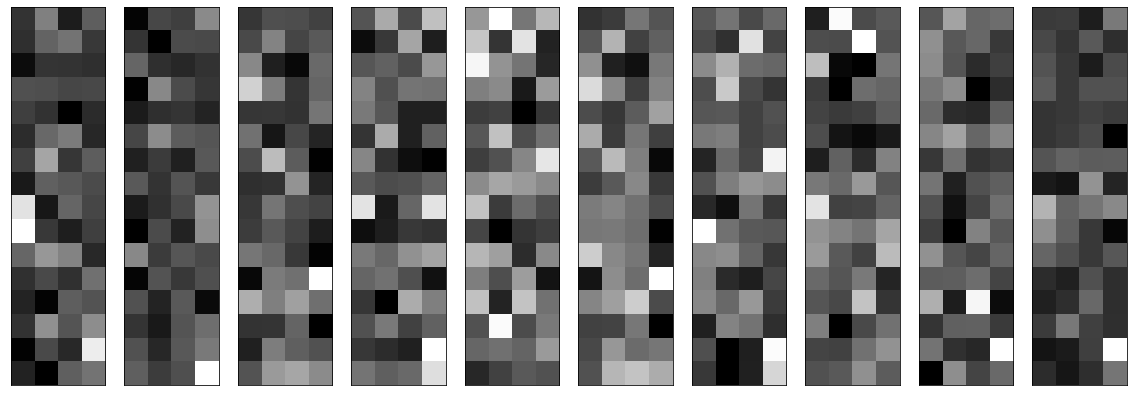

In [16]:
vnl_encoder = Model(x, h)
encoded_imgs1 = vnl_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs1[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Predictions made by the developed Vanilla Autoencoder Model on the Test set of the MNIST dataset :

In [17]:
decoded_imgs1 = vnl_autoencoder.predict(X_test)

To Plot the Original/Actual  Test set imagaes of the MNIST dataset :

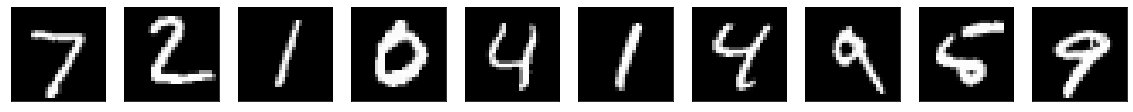

In [19]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

To Plot the predicted Output images of the developed Vanilla Autoencoder Model implemented on the Test set of the MNIST dataset :

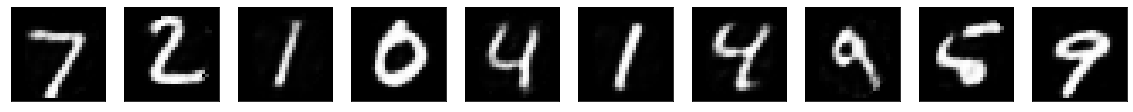

In [20]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
# display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#To Plot the losses of the developed Vanilla Autoencoder Model implemented on the Test set of the MNIST dataset :

dict_keys(['loss', 'val_loss'])


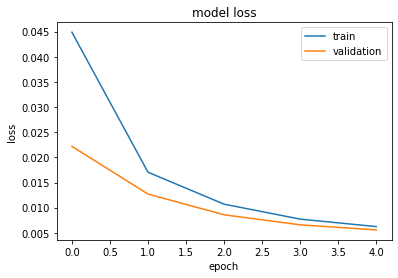

In [21]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()